<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/Assigment2_YuzhenYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Environment Set Up

In [30]:
# !rm -rf /content/*

In [31]:
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}

Cloning into 'MSSP-6070-YuzhenYang'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 269 (delta 43), reused 17 (delta 11), pack-reused 189 (from 1)
Receiving objects: 100% (269/269), 7.22 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [32]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
from datetime import datetime

working_directory = "/content/MSSP-6070-YuzhenYang/data/data_assignment2"

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)
warnings.filterwarnings("ignore")

try:
    os.chdir(working_directory)
    print(f"New working path successfully set: {os.getcwd()}")
except FileNotFoundError:
    print(f"error: path not exist: {working_directory}")

df = pd.read_csv("InternetSales.csv", encoding="latin1", low_memory=False)
print(f"Successfully load {"InternetSales.csv"}, {df.shape[0]} rows and{df.shape[1]} columns.")

New working path successfully set: /content/MSSP-6070-YuzhenYang/data/data_assignment2
Successfully load InternetSales.csv, 60398 rows and60 columns.


In [33]:
!pip install modelsummary

In [34]:
!pip install stargazer

# Part 2: Data Processing

In [35]:
##### ===== 2.1 Basic Inspection =====

print("\n===== 2.1 Basic Inspection =====")
print(df.info())
print("\nPreview of first 5 rows:")
display(df.head())

# Missing value report
missing_report = (
    df.isna().mean().sort_values(ascending=False).head() * 100
).round(2)
print("\nTop 5 columns with the highest missing percentage (%):")
print(missing_report)

# check if order key is unique
if all(c in df.columns for c in ["SalesOrderNumber", "SalesOrderLineNumber"]):
    dups = df.duplicated(subset=["SalesOrderNumber", "SalesOrderLineNumber"])
    print(f"\nDuplicate order key rows: {dups.sum()} / {len(df)}")
else:
    print("\nMissing key columns (SalesOrderNumber / SalesOrderLineNumber).")


===== 2.1 Basic Inspection =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        60398 non-null  int64  
 1   CustomerKey               60398 non-null  int64  
 2   GeographyKey              60398 non-null  int64  
 3   City                      60398 non-null  object 
 4   CountryRegionCode         60398 non-null  object 
 5   EnglishCountryRegionName  60398 non-null  object 
 6   CustomerAlternateKey      60398 non-null  object 
 7   Title                     307 non-null    object 
 8   FirstName                 60398 non-null  object 
 9   MiddleName                34903 non-null  object 
 10  LastName                  60398 non-null  object 
 11  NameStyle                 60398 non-null  bool   
 12  BirthDate                 60398 non-null  object 
 13  MaritalStatus             6

,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,ProductKey,EnglishProductName,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey.1,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,344,"Mountain-100 Silver, 38",20110119,20110131,20110126,11000,1,6,9,SO43793,1,1,1,3399.99,3399.99,0,0,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,353,"Mountain-200 Silver, 38",20130118,20130130,20130125,11000,2,6,9,SO51522,1,1,1,2319.99,2319.99,0,0,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,485,Fender Set - Mountain,20130118,20130130,20130125,11000,1,6,9,SO51522,2,1,1,21.98,21.98,0,0,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,573,"Touring-1000 Blue, 46",20130503,20130515,20130510,11000,1,6,9,SO57418,1,1,1,2384.07,2384.07,0,0,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,10/6/1971,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,541,Touring Tire,20130503,20130515,20130510,11000,1,6,9,SO57418,2,1,1,28.99,28.99,0,0,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,5/3/2013,5/15/2013,5/10/2013



Top 5 columns with the highest missing percentage (%):
CustomerPONumber         100.00
CarrierTrackingNumber    100.00
Suffix                    99.99
Title                     99.49
AddressLine2              98.17
dtype: float64

Duplicate order key rows: 0 / 60398


In [36]:
##### ===== 2.2 Data Cleaning and Processing =====

print("\n===== 2.2 Data Cleaning and Processing =====")

#### ---- date columns ----
date_cols = [c for c in df.columns if "Date" in c or "date" in c]
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors="coerce")

if "OrderDate" in df.columns:
    df["OrderYear"] = df["OrderDate"].dt.year

#### ---- customer age ----
if {"BirthDate", "OrderDate"} <= set(df.columns):
    ref_date = df["OrderDate"].max()
    df["Age_Float"] = (ref_date - df["BirthDate"]).dt.days / 365.25
    df["Age"] = np.floor(df["Age_Float"]).astype("Int64")
    print(f"Variable 'Age' generated, indicates customer age, using {ref_date.date()} as reference.")

#### ---- product category ----
if "EnglishProductName" in df.columns:
    df["ProductCategory"] = (
        df["EnglishProductName"]
        .astype(str)
        .apply(lambda x: x.split("-")[0].strip() if "-" in x else x)
    )
    print(f"Extracted product categories. Unique categories: {df['ProductCategory'].nunique()}")

#### ---- gender ----
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].map({"M": 1, "F": 0}).fillna(df["Gender"])

if "Gender" in df.columns:
    df["GenderLabel"] = df["Gender"].map({1: "Male", 0: "Female"}).fillna("Unknown")


#### ---- numeric columns ----
num_cols = [
    c
    for c in df.columns
    if any(tok in c.lower() for tok in ["amount", "price", "cost", "tax", "freight", "quantity", "income", "discount"])
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Done:conversion of date and numeric columns.")


===== 2.2 Data Cleaning and Processing =====
Variable 'Age' generated, indicates customer age, using 2014-01-28 as reference.
Extracted product categories. Unique categories: 35
Done:conversion of date and numeric columns.


In [37]:
##### ===== 2.3 Build Aggregated Tables (Order-level & Customer-level) =====

print("\n===== 2.3 Build Aggregated Tables (Order-level & Customer-level) =====")

#### ---- 2.3.1 Order level aggregation: df_order ----
if "SalesOrderNumber" in df.columns:
    agg_order = {
        "SalesAmount": "sum",
        "TaxAmt": "sum",
        "Freight": "sum",
        "OrderQuantity": "sum",
        "CustomerKey": "first",
        "EnglishCountryRegionName": "first",
        "OrderDate": "max",
    }
    df_order = (
        df.groupby("SalesOrderNumber")
        .agg(agg_order)
        .rename(
            columns={
                "SalesAmount": "order_sales",
                "TaxAmt": "order_tax",
                "Freight": "order_freight",
                "OrderQuantity": "order_qty",
                "OrderDate": "order_date",
            }
        )
        .reset_index()
    )
    df_order["order_year"] = df_order["order_date"].dt.year
    df_order["AOV"] = df_order["order_sales"]
    print(f"Built order level table df_order with shape: {df_order.shape}")
else:
    df_order = None
    print("Missing SalesOrderNumber, could not create df_order.")

#### ---- 2.3.2 Customer level aggregation: df_cust ----
if "CustomerKey" in df.columns:
    agg_cust = {
        "SalesAmount": "sum",
        "OrderQuantity": "sum",
        "YearlyIncome": "first",
        "Gender": "first",
        "GenderLabel": "first",
        "HouseOwnerFlag": "first",
        "EnglishCountryRegionName": "first",
    }
    df_cust = (
        df.groupby("CustomerKey")
        .agg(agg_cust)
        .rename(columns={"SalesAmount": "cust_sales", "OrderQuantity": "cust_qty"})
        .reset_index()
    )
    if df_order is not None:
        order_cnt = df_order.groupby("CustomerKey")["SalesOrderNumber"].nunique().reset_index(name="cust_orders")
        df_cust = df_cust.merge(order_cnt, on="CustomerKey", how="left")

    ### --- RFM indicators ---
    # (This part is not mentioned in my report, just in case for further analysis.)
    if df_order is not None:
        max_date = df_order["order_date"].max()
        last_order = df_order.groupby("CustomerKey")["order_date"].max().reset_index(name="last_order_date")
        df_cust = df_cust.merge(last_order, on="CustomerKey", how="left")
        df_cust["R_days"] = (max_date - df_cust["last_order_date"]).dt.days
        df_cust["F_orders"] = df_cust["cust_orders"]
        df_cust["M_amount"] = df_cust["cust_sales"]

    print(f"Built customer level table df_cust with shape: {df_cust.shape}")
else:
    df_cust = None
    print("Missing CustomerKey, could not create df_cust.")


===== 2.3 Build Aggregated Tables (Order-level & Customer-level) =====
Built order level table df_order with shape: (27659, 10)
Built customer level table df_cust with shape: (18484, 13)


In [38]:
##### ===== 2.4 Data summary and save =====

print("\n##### ===== 2.4 Data Summary and Export =====")
print(f"df (detail level): {df.shape}")
if df_order is not None:
    print(f"df_order (order level): {df_order.shape}")
if df_cust is not None:
    print(f"df_cust (customer level): {df_cust.shape}")

display(df.head(5))
if df_order is not None:
    display(df_order.head(5))
if df_cust is not None:
    display(df_cust.head(5))

df.to_csv("InternetSales_Cleaned.csv", index=False)
if df_order is not None:
    df_order.to_csv("InternetSales_Order.csv", index=False)
if df_cust is not None:
    df_cust.to_csv("InternetSales_Customer.csv", index=False)

print("\nData cleaning and aggregation completed. Files saved.")


##### ===== 2.4 Data Summary and Export =====
df (detail level): (60398, 65)
df_order (order level): (27659, 10)
df_cust (customer level): (18484, 13)


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,ProductKey,EnglishProductName,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey.1,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,OrderYear,Age_Float,Age,ProductCategory,GenderLabel
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,1971-10-06,M,NaN,1,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,344,"Mountain-100 Silver, 38",1970-01-01 00:00:00.020110119,1970-01-01 00:00:00.020110131,1970-01-01 00:00:00.020110126,11000,1,6,9,SO43793,1,1,1,3399.99,3399.99,0,0,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2011-01-19,2011-01-31,2011-01-26,2011,42.313484,42,Mountain,Male
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,1971-10-06,M,NaN,1,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,353,"Mountain-200 Silver, 38",1970-01-01 00:00:00.020130118,1970-01-01 00:00:00.020130130,1970-01-01 00:00:00.020130125,11000,2,6,9,SO51522,1,1,1,2319.99,2319.99,0,0,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,2013-01-18,2013-01-30,2013-01-25,2013,42.313484,42,Mountain,Male
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,1971-10-06,M,NaN,1,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,485,Fender Set - Mountain,1970-01-01 00:00:00.020130118,1970-01-01 00:00:00.020130130,1970-01-01 00:00:00.020130125,11000,1,6,9,SO51522,2,1,1,21.98,21.98,0,0,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,2013-01-18,2013-01-30,2013-01-25,2013,42.313484,42,Fender Set,Male
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,1971-10-06,M,NaN,1,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,573,"Touring-1000 Blue, 46",1970-01-01 00:00:00.020130503,1970-01-01 00:00:00.020130515,1970-01-01 00:00:00.020130510,11000,1,6,9,SO57418,1,1,1,2384.07,2384.07,0,0,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,2013-05-03,2013-05-15,2013-05-10,2013,42.313484,42,Touring,Male
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,Yang,False,1971-10-06,M,NaN,1,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,541,Touring Tire,1970-01-01 00:00:00.020130503,1970-01-01 00:00:00.020130515,1970-01-01 00:00:00.020130510,11000,1,6,9,SO57418,2,1,1,28.99,28.99,0,0,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,2013-05-03,2013-05-15,2013-05-10,2013,42.313484,42,Touring Tire,Male


,SalesOrderNumber,order_sales,order_tax,order_freight,order_qty,CustomerKey,EnglishCountryRegionName,order_date,order_year,AOV
0,SO43697,3578.2700,286.2616,89.4568,1,21768,Canada,2010-12-29,2010,3578.2700
1,SO43698,3399.9900,271.9992,84.9998,1,28389,France,2010-12-29,2010,3399.9900
2,SO43699,3399.9900,271.9992,84.9998,1,25863,United States,2010-12-29,2010,3399.9900
3,SO43700,699.0982,55.9279,17.4775,1,14501,United States,2010-12-29,2010,699.0982
4,SO43701,3399.9900,271.9992,84.9998,1,11003,Australia,2010-12-29,2010,3399.9900


,CustomerKey,cust_sales,cust_qty,YearlyIncome,Gender,GenderLabel,HouseOwnerFlag,EnglishCountryRegionName,cust_orders,last_order_date,R_days,F_orders,M_amount
0,11000,8248.99,8,90000,1,Male,1,Australia,3,2013-05-03,270,3,8248.99
1,11001,6383.88,11,60000,1,Male,0,Australia,3,2013-12-10,49,3,6383.88
2,11002,8114.04,4,60000,1,Male,1,Australia,3,2013-02-23,339,3,8114.04
3,11003,8139.29,9,70000,0,Female,0,Australia,3,2013-05-10,263,3,8139.29
4,11004,8196.01,6,80000,0,Female,1,Australia,3,2013-05-01,272,3,8196.01



Data cleaning and aggregation completed. Files saved.


# Part 3: Core Analysis

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.ticker import MaxNLocator
from IPython.display import display


--- Descriptive Statistics: Sales by year & country ---


EnglishCountryRegionName,Australia,Canada,France,Germany,United Kingdom,United States
order_year,,,,,,
2010,"20,909.78","3,578.27","3,399.99",0.00,699.10,"14,833.90"
2011,"2,563,732.25","571,571.80","410,845.33","520,500.16","550,591.22","2,458,285.17"
2012,"2,128,407.46","307,604.52","648,065.54","608,657.98","712,700.96","1,437,048.73"
2013,"4,339,443.38","1,085,632.65","1,578,511.80","1,761,876.36","2,124,007.29","5,462,078.86"
2014,"8,507.72","9,457.62","3,195.06","3,277.83","3,713.64","17,542.85"


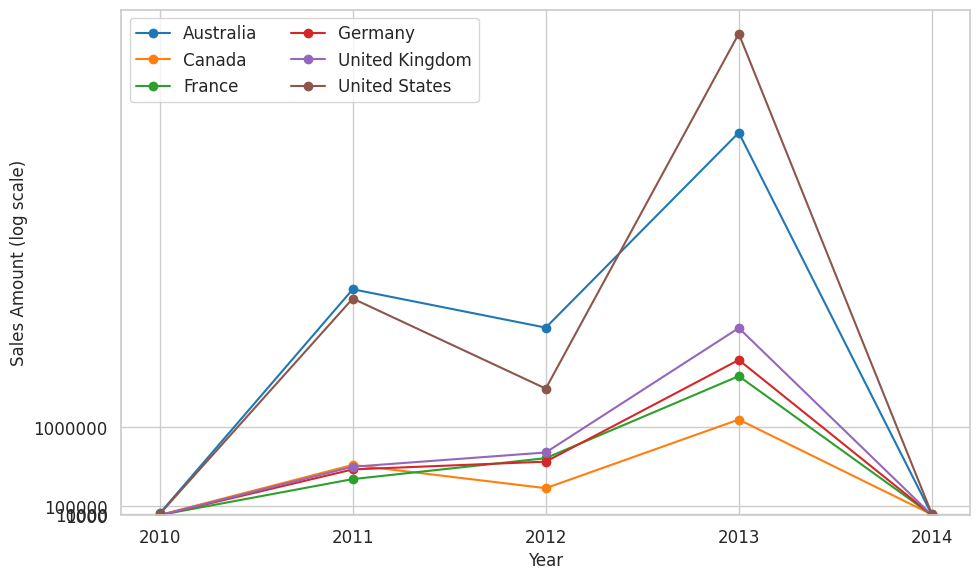


(Figure saved to F1_sales_by_year_country.png)
--- time range inspection ---
earliest order date in data set: 2010-12-29
latest order date in data set: 2014-01-28
--------------------------------------------------



In [40]:
# ===================================================================
##### ===== 3.1 Internet sales by year for each Country Region =====
# ===================================================================

#### ---- Aggregate sales by year & country ----
sales_year_country = (
    df_order
    .groupby(['order_year', 'EnglishCountryRegionName'], dropna=False)['order_sales']
    .sum()
    .reset_index()
    .sort_values(['order_year', 'order_sales'], ascending=[True, False])
)

#### ---- Pivot ----
sales_year_country_pivot = sales_year_country.pivot(
    index='order_year', columns='EnglishCountryRegionName', values='order_sales'
).fillna(0)

print("\n--- Descriptive Statistics: Sales by year & country ---")
display(sales_year_country_pivot.style.format('{:,.2f}'))

sales_year_country.to_csv("Q1_sales_by_year_country_long.csv", index=False)
sales_year_country_pivot.to_csv("Q1_sales_by_year_country_pivot.csv")

##### ---- Visualization: multi-line chart ----
sns.set_palette("tab10")
plt.figure(figsize=(10,6))
for col in sales_year_country_pivot.columns:
    plt.plot(sales_year_country_pivot.index, sales_year_country_pivot[col], marker='o', label=col)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title("Internet Sales by Year and Country Region")
plt.ylabel("Sales Amount (log scale)", fontsize=12)
plt.xlabel("Year", fontsize=12)

from matplotlib.ticker import LogLocator, ScalarFormatter
ax.yaxis.set_major_locator(LogLocator(base=10.0))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

plt.legend(loc='best', ncol=2)
plt.tight_layout()
plt.savefig("F1_sales_by_year_country.png", dpi=300)
plt.show()
print("\n(Figure saved to F1_sales_by_year_country.png)")

#### ---- data set time range inspection ----
if 'df_order' in locals() and 'order_date' in df_order.columns:
    min_date = df_order['order_date'].min()
    max_date = df_order['order_date'].max()
    print(f"--- time range inspection ---")
    print(f"earliest order date in data set: {min_date.date()}")
    print(f"latest order date in data set: {max_date.date()}")
    print("--------------------------------------------------\n")
else:
    print("[Warn] cannot find 'df_order' or 'order_date'.")


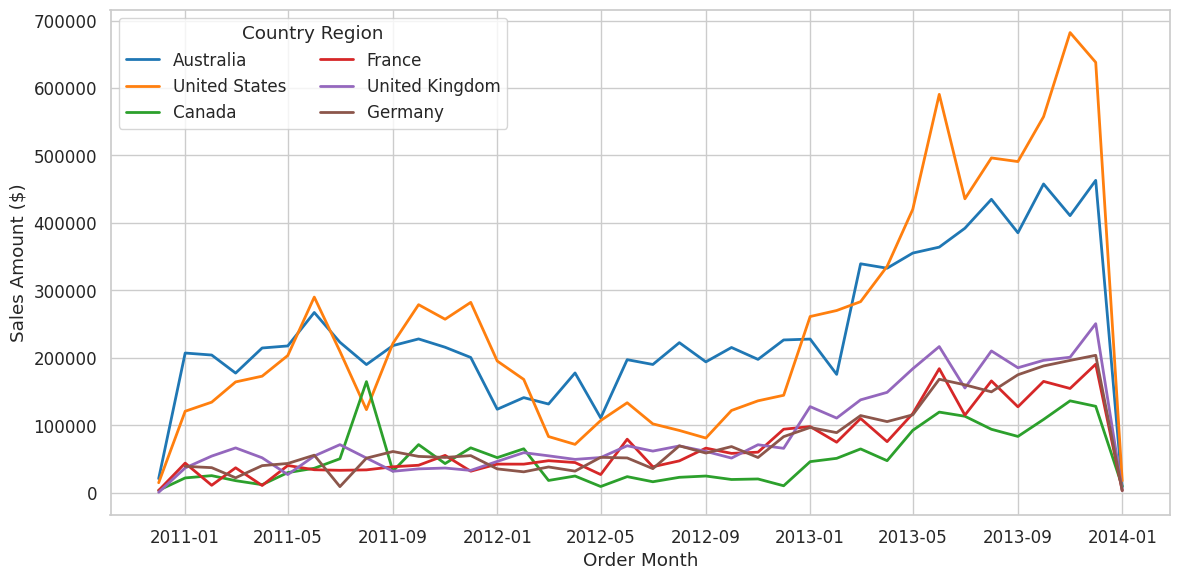


(Figure saved to F1_sales_by_month_country.png)


In [41]:
#### ---- Aggregate sales by month & country ----

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

if 'order_date' in df_order.columns:
    df_order['order_month'] = df_order['order_date'].dt.to_period('M').astype(str)
else:
    raise ValueError("order_date column not found in df_order.")

# sales by month & country
sales_month_country = (
    df_order
    .groupby(['order_month', 'EnglishCountryRegionName'], dropna=False)['order_sales']
    .sum()
    .reset_index()
    .sort_values(['order_month', 'order_sales'], ascending=[True, False])
)

sales_month_country['order_month'] = pd.to_datetime(sales_month_country['order_month'])

# visualization
sns.set(style="whitegrid", palette="tab10", font_scale=1.1)
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=sales_month_country,
    x='order_month',
    y='order_sales',
    hue='EnglishCountryRegionName',
    lw=2.0,
    estimator='sum',
    ci=None
)


# plt.title("Internet Sales by Month and Country Region", fontsize=14, fontweight='bold')
plt.xlabel("Order Month")
plt.ylabel("Sales Amount ($)")
plt.legend(title="Country Region", loc='best', ncol=2)
plt.tight_layout()
plt.savefig("F1_sales_by_month_country.png", dpi=300)
plt.show()

print("\n(Figure saved to F1_sales_by_month_country.png)")


In [42]:
# ===================================================================
##### ===== 3.2 Yearly Income (min, max, std) and Gender by Country Region =====
# ===================================================================

#### ---- YearlyIncome stats by country ----
income_stats = (
    df_cust
    .groupby('EnglishCountryRegionName', dropna=False)['YearlyIncome']
    .agg(count='count', mean='mean', std='std', min='min', max='max')
    .reset_index()
    .sort_values('mean', ascending=False)
)

#### ---- Gender distribution by country ----
# counts
gender_counts = (
    df_cust
    .groupby(['EnglishCountryRegionName', 'Gender'], dropna=False)['CustomerKey']
    .nunique()
    .reset_index(name='n_customers')
)

# percentages
gender_counts['pct'] = (
    gender_counts
    .groupby('EnglishCountryRegionName')['n_customers']
    .apply(lambda s: s / s.sum() * 100)
    .values
)

#### ---- results ----
# yearly income
print("\n--- YearlyIncome Stats ---")
print(income_stats.to_markdown(index=False, numalign='left', stralign='left'))

# gender
print("\n--- Gender Distribution ---")
print(gender_counts.to_markdown(index=False, numalign='left', stralign='left'))

# save
income_stats.to_csv("Q2_income_stats_by_country.csv", index=False)
gender_counts.to_csv("Q2_gender_distribution_by_country.csv", index=False)


--- YearlyIncome Stats ---
| EnglishCountryRegionName   | count   | mean    | std     | min   | max    |
|:---------------------------|:--------|:--------|:--------|:------|:-------|
| Australia                  | 3591    | 64338.6 | 31830   | 10000 | 170000 |
| United States              | 7819    | 63616.8 | 25706.5 | 10000 | 170000 |
| Canada                     | 1571    | 57167.4 | 20251.5 | 10000 | 170000 |
| United Kingdom             | 1913    | 52169.4 | 48432   | 10000 | 170000 |
| Germany                    | 1780    | 42943.8 | 35493.6 | 10000 | 130000 |
| France                     | 1810    | 35762.4 | 27277.4 | 10000 | 110000 |

--- Gender Distribution ---
| EnglishCountryRegionName   | Gender   | n_customers   | pct     |
|:---------------------------|:---------|:--------------|:--------|
| Australia                  | 0        | 1777          | 49.4848 |
| Australia                  | 1        | 1814          | 50.5152 |
| Canada                     | 0        | 767  

Figure saved as 'F2_yearly_income_by_country.png'


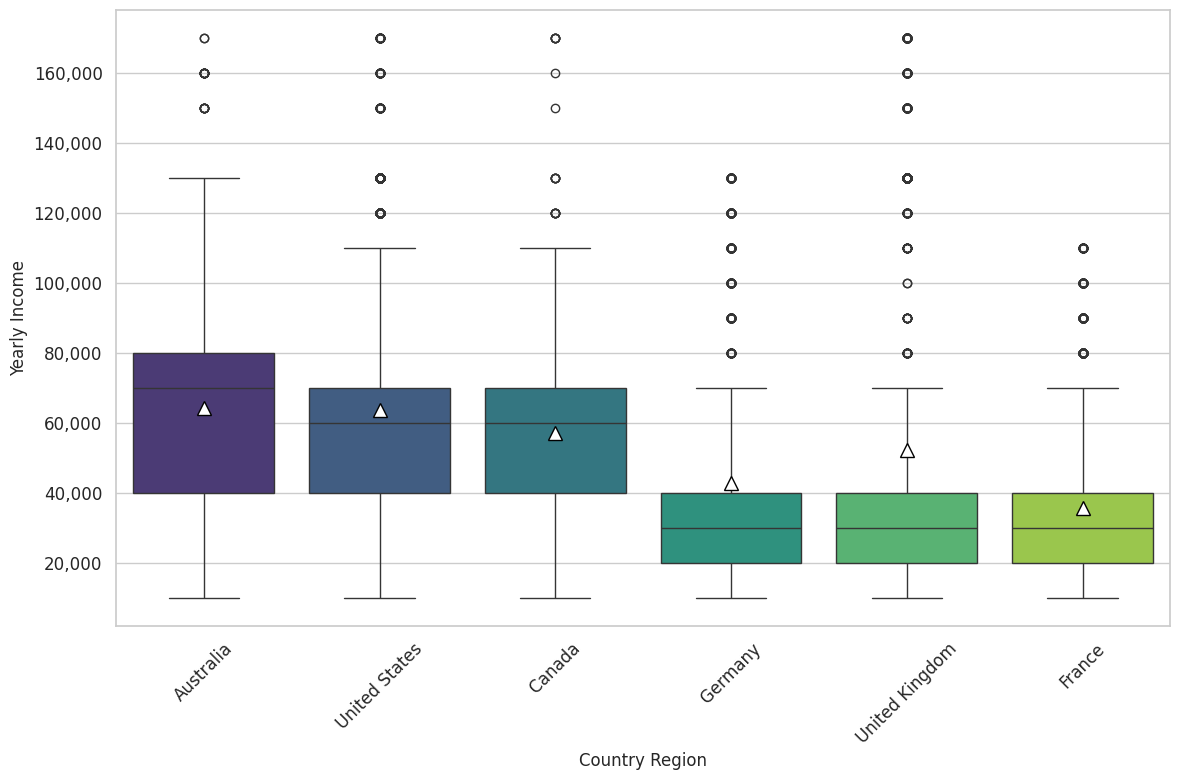

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter
from pathlib import Path
import warnings


#### ---- 3.2 Visualization 1: yearly income ----

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

sns.boxplot(
    x='EnglishCountryRegionName',
    y='YearlyIncome',
    data=df_cust,
    palette='viridis',
    showmeans=True,
    meanprops={"marker":"^",
               "markerfacecolor":"white",
               "markeredgecolor":"black",
               "markersize":"10"}
)

# plt.title('Yearly Income Distribution by Country/Region', fontsize=16)
plt.xlabel('Country Region', fontsize=12)
plt.ylabel('Yearly Income', fontsize=12)

plt.gca().get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ','))
)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('F2_yearly_income_by_country.png')
print("Figure saved as 'F2_yearly_income_by_country.png'")
plt.show()

Figure saved as 'F3_gender_distribution_by_country.png'


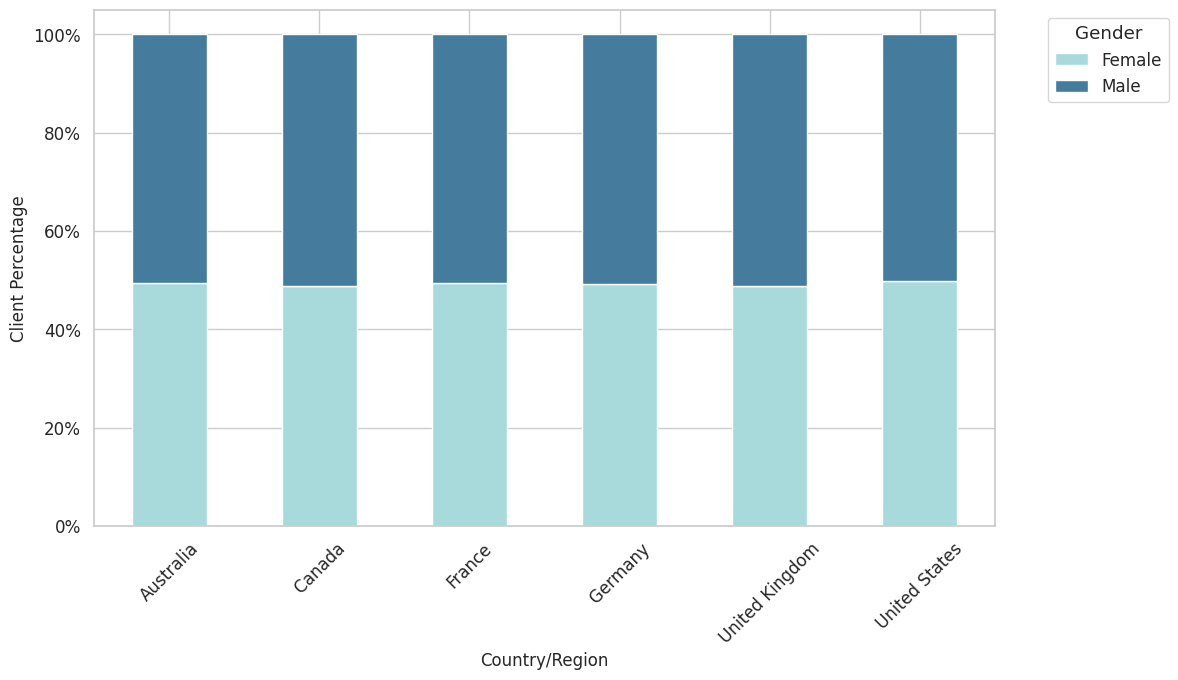

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

#### ---- 3.2 Visualization 2: gender ----

gender_pivot_pct = gender_counts.pivot(
    index='EnglishCountryRegionName',
    columns='Gender',
    values='pct'
)

sns.set_style('whitegrid')
gender_pivot_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['#A8DADC', '#457B9D']
)

# plt.title('gender distribution by country/region', fontsize=16)
plt.xlabel('Country/Region', fontsize=12)
plt.ylabel('Client Percentage', fontsize=12)
plt.legend(labels=["Female", "Male"],title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('F3_gender_distribution_by_country.png')
print("Figure saved as 'F3_gender_distribution_by_country.png'")
plt.show()

In [45]:
# ===================================================================
##### ===== 3.3 Average price of the product category with the highest sales =====
# ===================================================================

if 'ProductCategory' not in df.columns and 'EnglishProductName' in df.columns:
    df['ProductCategory'] = (
        df['EnglishProductName']
        .astype(str)
        .apply(lambda x: x.split('-')[0].strip() if '-' in x else x)
    )

if 'UnitPrice' not in df.columns:
    raise ValueError("UnitPrice column not found in df. Cannot compute average price.")

#### ---- total sales by product category & product----
sales_by_cat = (
    df.groupby('ProductCategory', dropna=False)['SalesAmount']
    .sum()
    .reset_index()
    .sort_values('SalesAmount', ascending=False)
)

sales_by_product = (
    df.groupby('EnglishProductName', dropna=False)['SalesAmount']
    .sum()
    .reset_index()
    .sort_values('SalesAmount', ascending=False)
)

#### ---- identify top category by total sales ----
top_category = sales_by_cat.iloc[0, 0]
top_category_df = df[df['ProductCategory'] == top_category].copy()

#### ---- average prices for the top category ----
# unweighted mean price
avg_price_unweighted = top_category_df['UnitPrice'].mean()

# weighted mean price by quantity
if 'OrderQuantity' in top_category_df.columns:
    w = top_category_df['OrderQuantity'].fillna(0)
    x = top_category_df['UnitPrice'].fillna(0)
    avg_price_weighted = (x * w).sum() / (w.sum() if w.sum() != 0 else np.nan)
else:
    avg_price_weighted = np.nan

sales_by_cat.to_csv("Q3_sales_by_product_category.csv", index=False)
pd.DataFrame({
    "top_category": [top_category],
    "avg_unit_price_unweighted": [avg_price_unweighted],
    "avg_unit_price_weighted_by_qty": [avg_price_weighted]
}).to_csv("Q3_top_category_avg_price.csv", index=False)

print("\n--- Q: What is the average price of the product category that generates the most sales? ---")
print(f"top category is: {top_category}")
print(f"Unweighted average price of this category: ${avg_price_unweighted:,.2f}")
print(f"Weighted average price of this category: ${avg_price_weighted:,.2f}")


--- Q: What is the average price of the product category that generates the most sales? ---
top category is: Road
Unweighted average price of this category: $1,799.77
Weighted average price of this category: $1,799.77



--- Top 5 Product Categories by Total Sales ---
 1. Road                       SalesAmount = $14,520,584.04
 2. Mountain                   SalesAmount = $9,952,759.56
 3. Touring                    SalesAmount = $3,844,801.05
 4. Sport                      SalesAmount = $225,335.60
 5. Long                       SalesAmount = $86,782.64


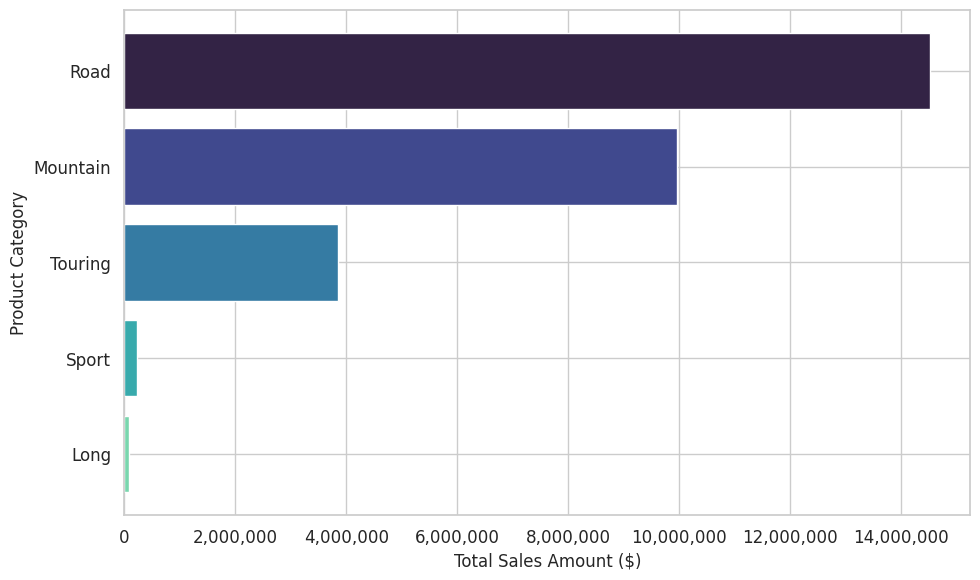

In [46]:
# ============================================================
##### ===== 3.3 Average price of the product category with the highest sales =====
# ============================================================

#### ---- top 5 categories by total sales ----
top5_cats = sales_by_cat.head(5).copy()

print("\n--- Top 5 Product Categories by Total Sales ---")
for i, row in enumerate(top5_cats.itertuples(index=False), start=1):
    print(f"{i:2d}. {row.ProductCategory:<25}  SalesAmount = ${row.SalesAmount:,.2f}")

top5_cats.to_csv("Q3_top5_categories_sales.csv", index=False)

#### ---- visualization ----
import matplotlib.pyplot as plt
def currency_formatter(x, pos):
    return f'{x:,.0f}'

formatter = FuncFormatter(currency_formatter)

colors = sns.color_palette("mako", n_colors=len(top5_cats))

plt.figure(figsize=(10, 6))
plt.barh(top5_cats['ProductCategory'], top5_cats['SalesAmount'], color=colors)
plt.gca().invert_yaxis()

ax = plt.gca()
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(formatter)
# plt.title("Top 5 Product Categories by Total Sales", fontsize=14, fontweight='bold')
plt.xlabel("Total Sales Amount ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()

plt.savefig("Q3_top5_categories_sales_barh.png", dpi=300)
plt.show()



--- Top 5 Products by Total Sales ---
 1. Mountain-200 Black, 46     SalesAmount = $1,373,469.55
 2. Mountain-200 Black, 42     SalesAmount = $1,363,142.09
 3. Mountain-200 Silver, 38    SalesAmount = $1,339,462.79
 4. Mountain-200 Silver, 46    SalesAmount = $1,301,100.10
 5. Mountain-200 Black, 38     SalesAmount = $1,294,866.14


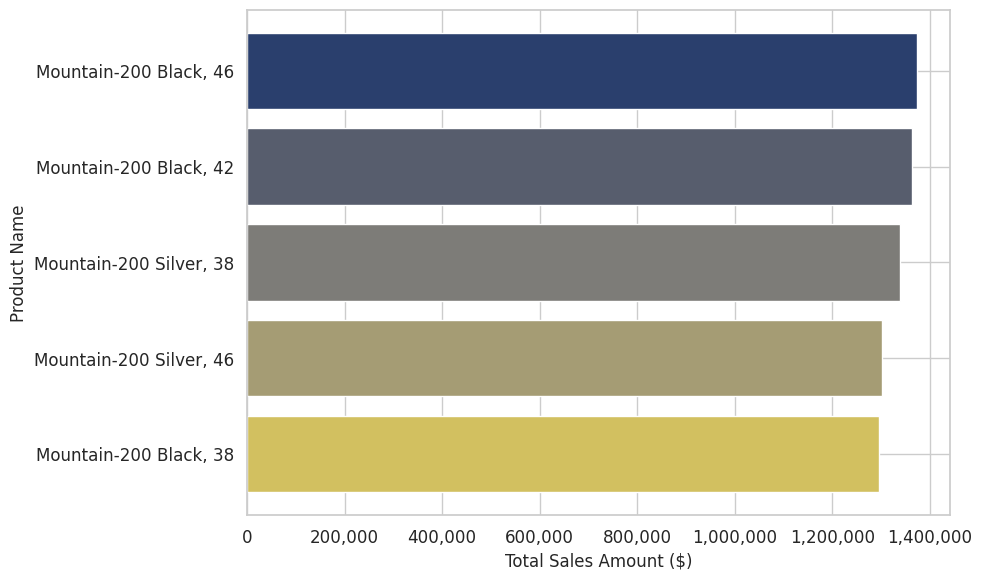

In [47]:
#### ---- top 5 products by total sales ----
top5_product = sales_by_product.head(5).copy()

print("\n--- Top 5 Products by Total Sales ---")
for i, row in enumerate(top5_product.itertuples(index=False), start=1):
    print(f"{i:2d}. {row.EnglishProductName:<25}  SalesAmount = ${row.SalesAmount:,.2f}")

top5_product.to_csv("Q3_top5_product_sales.csv", index=False)

#### ---- visualization ----
import matplotlib.pyplot as plt
def currency_formatter(x, pos):
    return f'{x:,.0f}'

formatter = FuncFormatter(currency_formatter)

colors = sns.color_palette("cividis", n_colors=len(top5_cats))

plt.figure(figsize=(10, 6))
plt.barh(top5_product['EnglishProductName'], top5_product['SalesAmount'], color=colors)
plt.gca().invert_yaxis()

ax = plt.gca()
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(formatter)
# plt.title("Top 5 Products by Total Sales", fontsize=14, fontweight='bold')
plt.xlabel("Total Sales Amount ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.tight_layout()

plt.savefig("Q3_top5_product_sales_barh.png", dpi=300)
plt.show()

In [48]:
# ===================================================================
##### ===== 3.4 Does owning a home make a difference in sales? =====
# ===================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings

if 'cust_sales' not in df_cust.columns and 'SalesAmount' in df_cust.columns:
    df_cust = df_cust.rename(columns={'SalesAmount': 'cust_sales'})

if 'HouseOwnerFlag' in df_cust.columns:
    if not pd.api.types.is_numeric_dtype(df_cust['HouseOwnerFlag']):
         df_cust['HouseOwnerFlag'] = pd.to_numeric(df_cust['HouseOwnerFlag'], errors='coerce')

    df_cust['HouseOwnerLabel'] = df_cust['HouseOwnerFlag'].map({1:'Owner', 0:'Renter'})
else:
    flag_map = df[['CustomerKey','HouseOwnerFlag']].drop_duplicates('CustomerKey')
    df_cust = df_cust.merge(flag_map, on='CustomerKey', how='left')
    if 'HouseOwnerFlag' in df_cust.columns:
         df_cust['HouseOwnerLabel'] = df_cust['HouseOwnerFlag'].map({1:'Owner', 0:'Renter'})

# basic group stats
group_stats = (
    df_cust
    .dropna(subset=['cust_sales', 'HouseOwnerLabel'])
    .groupby('HouseOwnerLabel')['cust_sales']
    .agg(n='count', mean='mean', median='median', std='std')
    .reset_index()
    .sort_values('mean', ascending=False)
)

group_stats.to_csv("Q4_homeowner_group_stats.csv", index=False)

# Welch's t-test (owner vs renter)
owners = df_cust.loc[df_cust['HouseOwnerLabel']=='Owner', 'cust_sales'].dropna()
renters = df_cust.loc[df_cust['HouseOwnerLabel']=='Renter', 'cust_sales'].dropna()

t_stat, p_val = stats.ttest_ind(owners, renters, equal_var=False)

# Cohen's d (Hedges' g for unequal n)
def cohens_d(a, b):
    a = np.array(a); b = np.array(b)
    na, nb = len(a), len(b)
    va, vb = a.var(ddof=1), b.var(ddof=1)
    # pooled SD (unbiased)
    s = np.sqrt(((na-1)*va + (nb-1)*vb) / (na + nb - 2))
    if s == 0:
        return np.nan
    d = (a.mean() - b.mean()) / s
    # small sample correction (Hedges' g)
    correction = 1 - (3 / (4*(na+nb) - 9))
    return d * correction

effect_size = cohens_d(owners, renters)

with open("Q4_homeowner_ttest_effect.txt", "w") as f:
    f.write(f"Welch t-test: t = {t_stat:.4f}, p = {p_val:.6f}\n")
    f.write(f"Hedges' g (effect size): {effect_size:.4f}\n")
    f.write(f"Owner mean = {owners.mean():.2f}, Renter mean = {renters.mean():.2f}\n")
    f.write(f"Owner n = {owners.shape[0]}, Renter n = {renters.shape[0]}\n")

In [49]:
#### ---- OLS with robust (HC3) SE ----
model_df = df_cust.copy()

needed = ['cust_sales', 'HouseOwnerFlag', 'YearlyIncome', 'Gender', 'EnglishCountryRegionName']
missing_needed = [c for c in needed if c not in model_df.columns]
if missing_needed:
    extra = df[['CustomerKey'] + [c for c in missing_needed if c in df.columns]].drop_duplicates('CustomerKey')
    model_df = model_df.merge(extra, on='CustomerKey', how='left')

model_df = model_df.dropna(subset=['cust_sales', 'HouseOwnerFlag'])

final_missing = [c for c in needed if c not in model_df.columns]
if final_missing:
    raise ValueError(f"ERROR: can't find or merge critical columns: {final_missing}. can't run OLS.")

### --- define model formulas ---
formula_M1 = "np.log1p(cust_sales) ~ C(HouseOwnerFlag)"
formula_M2 = "np.log1p(cust_sales) ~ C(HouseOwnerFlag) + np.log1p(YearlyIncome)"
formula_M3 = "np.log1p(cust_sales) ~ C(HouseOwnerFlag) + np.log1p(YearlyIncome) + C(Gender)"
formula_M4 = "np.log1p(cust_sales) ~ C(HouseOwnerFlag) + np.log1p(YearlyIncome) + C(Gender) + C(EnglishCountryRegionName)"

### --- fit OLS models ---
M1 = smf.ols(formula=formula_M1, data=model_df).fit(cov_type='HC3')
M2 = smf.ols(formula=formula_M2, data=model_df).fit(cov_type='HC3')
M3 = smf.ols(formula=formula_M3, data=model_df).fit(cov_type='HC3')
M4 = smf.ols(formula=formula_M4, data=model_df).fit(cov_type='HC3')

print("\n=== Home Ownership Effect (Welch t-test) ===")
print(f"t = {t_stat:.4f}, p = {p_val:.6f}, Hedges' g = {effect_size:.4f}")
print("Group means (cust_sales):")
print(group_stats)

ols_summary = M4.summary().as_text()
with open("Q4_homeowner_ols_summary.txt", "w") as f:
    f.write(ols_summary)

# quick summary
print("\n=== Q4: OLS (robust HC3) — log1p(cust_sales) on HomeOwner + controls ===")
print(M4.summary())


=== Home Ownership Effect (Welch t-test) ===
t = 3.9838, p = 0.000068, Hedges' g = 0.0615
Group means (cust_sales):
  HouseOwnerLabel      n         mean  median          std
0           Owner  12502  1630.567093  342.00  2159.068509
1          Renter   5982  1500.054735  209.96  2046.878581

=== Q4: OLS (robust HC3) — log1p(cust_sales) on HomeOwner + controls ===
                             OLS Regression Results                             
Dep. Variable:     np.log1p(cust_sales)   R-squared:                       0.044
Model:                              OLS   Adj. R-squared:                  0.044
Method:                   Least Squares   F-statistic:                     105.5
Date:                  Fri, 31 Oct 2025   Prob (F-statistic):          6.06e-173
Time:                          21:33:49   Log-Likelihood:                -40012.
No. Observations:                 18484   AIC:                         8.004e+04
Df Residuals:                     18475   BIC:                   

In [50]:
### --- OLS Summary table ---

import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

stargazer = Stargazer([M1, M2, M3, M4])

stargazer.title("Regression Results: Home Ownership Effect (OLS)")
stargazer.custom_columns(["(1)", "(2)", "(3)", "(4)"], [1, 1, 1, 1])
stargazer.show_degrees_of_freedom = False
stargazer.significant_digits(3)
stargazer.show_adj_r2 = True

stargazer.covariate_order([
    "C(HouseOwnerFlag)[T.1]",
    "np.log1p(YearlyIncome)",
    "C(Gender)[T.1]",
    "C(EnglishCountryRegionName)[T.Canada]",
    "C(EnglishCountryRegionName)[T.France]",
    "C(EnglishCountryRegionName)[T.Germany]",
    "C(EnglishCountryRegionName)[T.United Kingdom]",
    "C(EnglishCountryRegionName)[T.United States]"
])

# regression table
from IPython.core.display import HTML
display(HTML(stargazer.render_html()))

with open("OLS_home_ownership.html", "w") as f:
    f.write(stargazer.render_html())

print("\n regression table successfully generated and saved as 'OLS_home_ownership.html'.")


 regression table successfully generated and saved as 'OLS_home_ownership.html'.


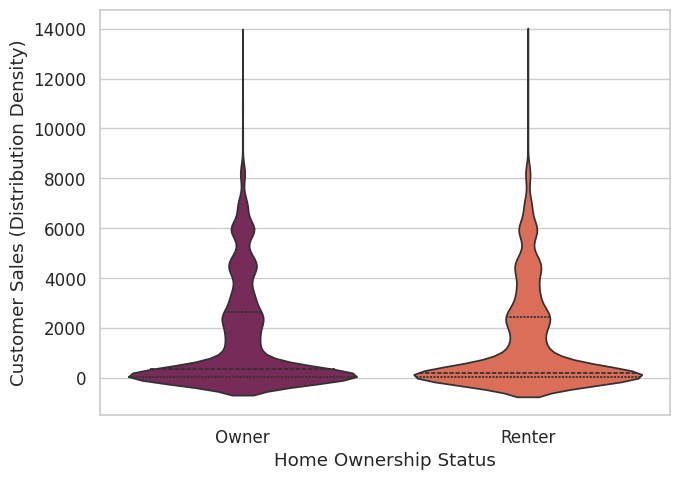

In [51]:
#### ---- visualization: Violin Plot----

plt.figure(figsize=(7, 5))

sns.violinplot(
    x='HouseOwnerLabel',
    y='cust_sales',
    data=df_cust.dropna(subset=['cust_sales', 'HouseOwnerLabel']),
    order=['Owner', 'Renter'],
    palette='rocket',
    inner='quartile',
    bw='silverman'
)

# plt.title(f'Violin Plot of Customer Sales Distribution')
plt.xlabel('Home Ownership Status')
plt.ylabel('Customer Sales (Distribution Density)')

plt.tight_layout()
plt.savefig("F4_homeowner_sales_violinplot.png", dpi=300)
plt.show()

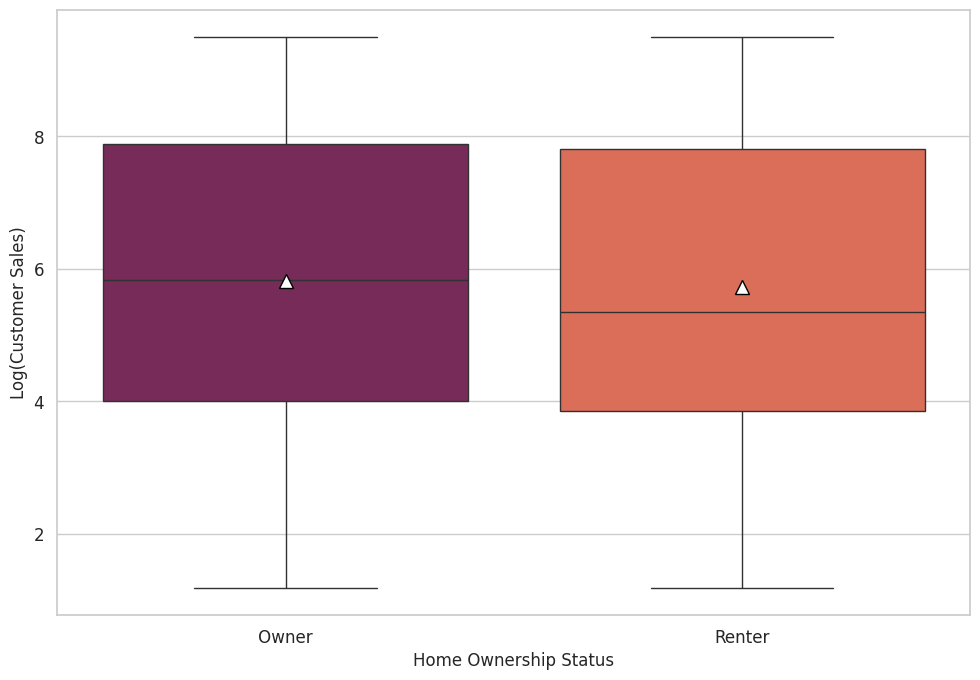

In [52]:
 # --- Visualization (Boxplot) ---

plt.figure(figsize=(10, 7))
if 'log_cust_sales' not in model_df.columns:
    model_df['log_cust_sales'] = np.log1p(model_df['cust_sales'])

sns.boxplot(
    x='HouseOwnerLabel',
    y='log_cust_sales',
    data=model_df,
     order=['Owner', 'Renter'],
    palette='rocket',
    showmeans=True,
    meanprops={"marker":"^",
                "markerfacecolor":"white",
                "markeredgecolor":"black",
                "markersize":"10"}

)
# plt.title('Box Plot of Customer Sales Distribution (after log tranformation)', fontsize=16)
plt.xlabel('Home Ownership Status', fontsize=12)
plt.ylabel('Log(Customer Sales)', fontsize=12)
plt.tight_layout()
plt.savefig('F5_homeowner_log_sales_boxplot.png')
plt.show()